### Homework 3

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataFrame = pd.read_csv("hmelq.csv")
dataFrame.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [5]:
dataFrame = dataFrame.dropna()
dataFrame.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,2018.0,0.088206,0.283665,0.00,0.0000,0.000,0.0000,1.000
loan,2018.0,19010.257681,10768.607345,1700.00,12000.0000,16900.000,23600.0000,89900.000
mortdue,2018.0,76337.035183,44476.368189,5076.00,49577.2500,67595.000,92922.7500,399412.000
value,2018.0,106899.244797,54026.707096,23031.00,71287.2500,94514.000,121220.7500,512650.000
yoj,2018.0,9.003964,7.573012,0.00,3.0000,7.000,13.0000,41.000
derog,2018.0,0.150149,0.580421,0.00,0.0000,0.000,0.0000,10.000
delinq,2018.0,0.264123,0.789816,0.00,0.0000,0.000,0.0000,10.000
clage,2018.0,180.645020,84.420116,0.49,118.2050,176.670,229.6925,1168.230
ninq,2018.0,1.037661,1.578414,0.00,0.0000,0.000,2.0000,13.000
clno,2018.0,22.265114,9.457238,0.00,16.0000,21.000,27.0000,64.000


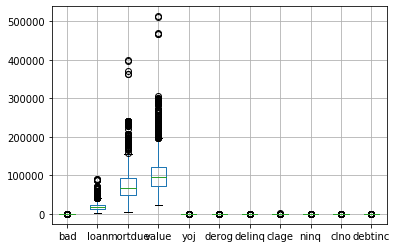

In [10]:
dataFrame.boxplot()

In [17]:
df_train=dataFrame.drop(columns = ["bad", "reason", "job"])
df_y=dataFrame["bad"]

In [32]:
xTrain, xTest, yTrain, yTest = train_test_split(df_train,df_y,test_size = 0.25,)
model = LogisticRegressionCV(cv=10, multi_class='ovr').fit(xTrain, yTrain)
yPred = model.predict(xTest)
print(classification_report(yTest, yPred))


              precision    recall  f1-score   support

           0       0.91      1.00      0.96       462
           1       0.00      0.00      0.00        43

    accuracy                           0.91       505
   macro avg       0.46      0.50      0.48       505
weighted avg       0.84      0.91      0.87       505



In [40]:
rfecv = RFECV(estimator=RandomForestClassifier() , step=10, cv=10,scoring='accuracy') 
rfecv = rfecv.fit(xTrain, yTrain)
print('Optimal features for accuracy:', str(xTrain.columns[rfecv.support_].values))

Optimal features for accuracy: ['loan' 'mortdue' 'value' 'yoj' 'derog' 'delinq' 'clage' 'ninq' 'clno'
 'debtinc']


In [38]:
rfecv = RFECV(estimator=RandomForestClassifier() , step=10, cv=10,scoring='precision') 
rfecv = rfecv.fit(xTrain, yTrain)
print('Optimal features for precision:', str(xTrain.columns[rfecv.support_].values))

Optimal features : ['loan' 'mortdue' 'value' 'yoj' 'derog' 'delinq' 'clage' 'ninq' 'clno'
 'debtinc']


In [39]:
rfecv = RFECV(estimator=RandomForestClassifier() , step=10, cv=10,scoring='recall') 
rfecv = rfecv.fit(xTrain, yTrain)
print('Optimal features for recall:', str(xTrain.columns[rfecv.support_].values))

Optimal features for recall: ['loan' 'mortdue' 'value' 'yoj' 'derog' 'delinq' 'clage' 'ninq' 'clno'
 'debtinc']


              precision    recall  f1-score   support

           0       0.91      1.00      0.96       462
           1       0.00      0.00      0.00        43

    accuracy                           0.91       505
   macro avg       0.46      0.50      0.48       505
weighted avg       0.84      0.91      0.87       505



Text(33.0, 0.5, 'Actuals')

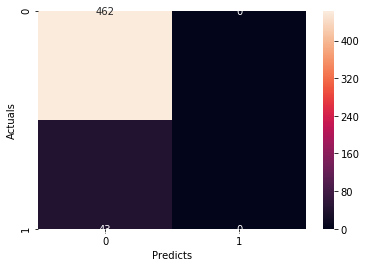

In [42]:
model = LogisticRegressionCV(cv=10, multi_class='ovr').fit(xTrain[xTrain.columns[rfecv.support_]], yTrain)
yPred = model.predict(xTest[xTrain.columns[rfecv.support_]])
print(classification_report(yTest, yPred))
ax = sns.heatmap(confusion_matrix(yTest, yPred), annot = True, fmt = "d")
ax.set_xlabel("Predicts")
ax.set_ylabel("Actuals")